In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
img = cv2.imread('leaf.jpg')

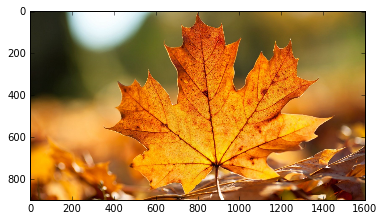

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

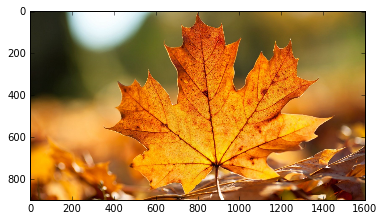

In [4]:
blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)

    sobel[sobel > 255] = 255;
    return sobel

In [6]:
# edgeImg = cv2.Canny(img,200,300)
edgeImg = np.max( [ edgedetect(blurred[:,:, 0]), edgedetect(blurred[:,:, 1]), edgedetect(blurred[:,:, 2]) ], axis=0 )

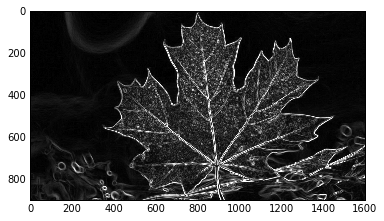

In [7]:
plt.imshow(edgeImg,cmap='gray')
plt.show()

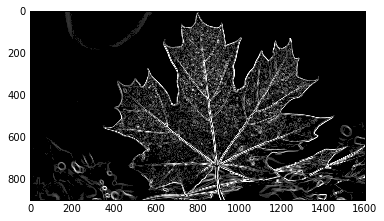

In [8]:
mean = np.mean(edgeImg);
# Zero any value that is less than mean. This reduces a lot of noise.
edgeImg[edgeImg <= mean] = 0;
plt.imshow(edgeImg,cmap='gray')
plt.show()

In [9]:
def findSignificantContours (img, edgeImg):
    image, contours, heirarchy = cv2.findContours(edgeImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find level 1 contours
    level1 = []
    for i, tupl in enumerate(heirarchy[0]):
        # Each array is in format (Next, Prev, First child, Parent)
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl, 0, [i])
            level1.append(tupl)
    significant = []
    tooSmall = edgeImg.size * 5 / 100 # If contour isn't covering 5% of total area of image then it probably is too small
    for tupl in level1:
        contour = contours[tupl[0]];
        area = cv2.contourArea(contour)
        if area > tooSmall:
            significant.append([contour, area])

    significant.sort(key=lambda x: x[1])
    #print ([x[1] for x in significant]);
    return [x[0] for x in significant];

In [10]:
edgeImg_8u = np.asarray(edgeImg, np.uint8)

# Find contours
significant = findSignificantContours(img, edgeImg_8u)

In [11]:
# Mask
mask = edgeImg.copy()
mask[mask > 0] = 0
cv2.fillPoly(mask, significant, 255)
# Invert mask
mask = np.logical_not(mask)

#Finally remove the background
img[mask] = 0;
img[np.logical_not(mask)] = 255;

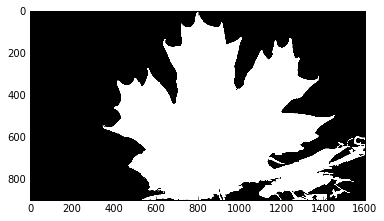

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()